In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import hilbert
from src.DMM_EM import ACGEM, mixture_EM_loop

Running diametrical clustering initialization
Initializing Lambda based on the clustering centroids
Beginning EM loop


Convergence towards tol: 6.70e-16:   0%|          | 12/10000 [00:00<00:24, 415.52it/s]


Running diametrical clustering initialization
Initializing Lambda based on the clustering centroids
Beginning EM loop


Convergence towards tol: 3.34e-16:   0%|          | 12/10000 [00:00<00:25, 391.78it/s]


Running diametrical clustering initialization
Initializing Lambda based on the clustering centroids
Beginning EM loop


Convergence towards tol: 6.59e-16:   0%|          | 12/10000 [00:00<00:25, 392.84it/s]


Running diametrical clustering initialization
Initializing Lambda based on the clustering centroids
Beginning EM loop


Convergence towards tol: 1.53e-16:   0%|          | 12/10000 [00:00<00:23, 420.14it/s]


Running diametrical clustering initialization
Initializing Lambda based on the clustering centroids
Beginning EM loop


Convergence towards tol: 3.04e-15:   0%|          | 12/10000 [00:00<00:23, 420.06it/s]


Running diametrical clustering initialization
Initializing Lambda based on the clustering centroids
Beginning EM loop


Convergence towards tol: 4.78e-15:   0%|          | 12/10000 [00:00<00:24, 404.39it/s]


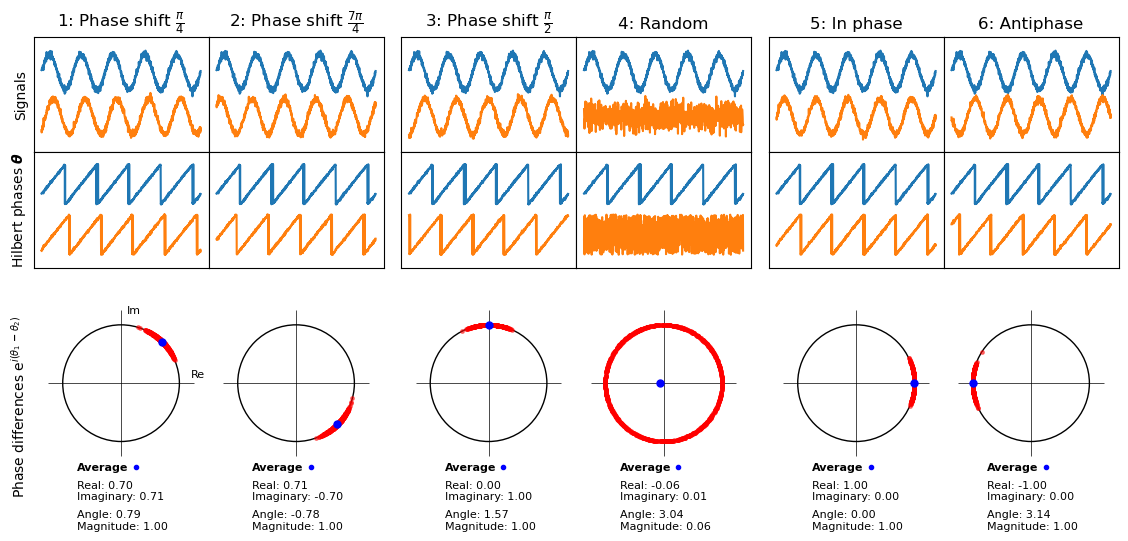

In [4]:
# make two oscillating signals. In the first quarter of the time series they should be in phase, in the second quarter they should be slightly out-of-phase where signal1 precedes signal2, in the fourt quarter they should be in anti-phase, and in the fourth quarter they should be slightly out-of-phase where signal2 precedes signal1.
n = 1000
noise_level = 0.1
t = np.linspace(0, 5, n)
noises = np.zeros((2,n))
noises[0] = np.random.normal(0, noise_level, n)
noises[1] = np.random.normal(0, noise_level, n)
signal1 = np.zeros((2,n))
signal1[0] = np.sin(2*np.pi*t) 
signal1[1] = np.sin(2*np.pi*t)-2.5
signal2 = np.zeros((2,n))
signal2[0] = np.sin(2*np.pi*t)
signal2[1] = np.sin(2*np.pi*t - np.pi/4)-2.5
signal3 = np.zeros((2,n))
signal3[0] = np.sin(2*np.pi*t)
signal3[1] = np.sin(2*np.pi*t - np.pi/2)-2.5
signal4 = np.zeros((2,n))
signal4[0] = np.sin(2*np.pi*t)
signal4[1] = np.sin(2*np.pi*t - 7*np.pi/4)-2.5
signal5 = np.zeros((2,n))
signal5[0] = np.sin(2*np.pi*t)
signal5[1] = np.sin(2*np.pi*t - np.pi)-2.5
signal6 = np.zeros((2,n))
signal6[0] = np.sin(2*np.pi*t)
signal6[1] = np.random.normal(0, 0.4, n)-2.5
signals = [signal2, signal4,0, signal3,signal6,0, signal1, signal5]

# plot the signals concatenated
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(3, 8,wspace=0, hspace=0, height_ratios=[1,1,2],width_ratios=[1,1,0.1,1,1,0.1,1,1])
axs = gs.subplots()
for i in range(len(signals)):
    if i==2 or i==5:
        axs[0,i].axis('off')
        continue
    axs[0,i].plot(signals[i].T+noises.T)
    axs[0,i].set_xticks([])
    axs[0,i].set_yticks([])
    axs[0,i].set_ylim(-4.5, 2)
axs[0,0].set_title(r'1: Phase shift $\frac{\pi}{4}$')
axs[0,1].set_title(r'2: Phase shift $\frac{7\pi}{4}$')
axs[0,3].set_title(r'3: Phase shift $\frac{\pi}{2}$')
axs[0,4].set_title('4: Random')
axs[0,6].set_title('5: In phase')
axs[0,7].set_title('6: Antiphase')
axs[0,0].set_ylabel('Signals')

for i in range(len(signals)):
    if i==2 or i==5:
        axs[1,i].axis('off')
        continue
    sig1 = signals[i][0]+noises[0]
    sig2 = signals[i][1]+noises[1]
    hil1 = np.angle(hilbert(sig1-np.mean(sig1)))
    hil2 = np.angle(hilbert(sig2-np.mean(sig2)))-2.5*np.pi
    hils = np.array([hil1, hil2])
    axs[1,i].plot(hils.T)
    axs[1,i].set_xticks([])
    axs[1,i].set_yticks([])
    axs[1,i].set_ylim(-13, 5)
axs[1,0].set_ylabel(r'Hilbert phases $\boldsymbol{\theta}$')

for i in range(len(signals)):
    if i==2 or i==5:
        axs[2,i].axis('off')
        continue
    axs[2,i].set_aspect('equal')
    axs[2,i].add_artist(plt.Circle((0, 0), 1, fill=False))
    axs[2,i].set_xlim(-1.5, 1.5)
    axs[2,i].set_ylim(-1.5, 1.5)
    axs[2,i].set_xticks([])
    axs[2,i].set_yticks([])
    axs[2,i].vlines(0, -1.25, 1.25, color='black', linewidth=0.5)
    axs[2,i].hlines(0, -1.25, 1.25, color='black', linewidth=0.5)
    axs[2,i].axis('off')
    sig1 = signals[i][0]+noises[0]
    sig2 = signals[i][1]+noises[1]
    hil1 = np.angle(hilbert(sig1-np.mean(sig1)))
    hil2 = np.angle(hilbert(sig2-np.mean(sig2)))
    inp1 = (np.cos(hil1)+1j*np.sin(hil1))/np.sqrt(2)
    inp2 = (np.cos(hil2)+1j*np.sin(hil2))/np.sqrt(2)
    hils = np.array([inp1, inp2])
    model = ACGEM.ACG(p=2,complex=True)
    out = mixture_EM_loop.mixture_EM_loop(model,data=hils.T,init='diametrical_clustering')
    fit = out[0]['Lambda'][0,0,1]
    circular_difference_signal = hil1-hil2
    axs[2,i].plot(np.cos(circular_difference_signal), np.sin(circular_difference_signal), 'r.', alpha=0.5, markersize=5)
    axs[2,i].plot(np.real(fit), np.imag(fit), 'b.', alpha=1, markersize=10)
    if i==0:
        axs[2,i].text(1.2,0.1,'Re', fontsize=8)
        axs[2,i].text(0.1,1.2,'Im', fontsize=8)
        axs[2,0].text(-1.9,-1.9,r'Phase differences $\operatorname{e}^{i(\boldsymbol{\theta_1-\theta_2})}$', fontsize=10,rotation=90)
    # elif i==2:
    #     axs[2,i].legend(handles=[plt.plot([],'r.')[0],plt.plot([],'b.')[0]],labels=[r'$e^{i(\theta_1-\theta2)}$', 'Estimated fit'], loc=(0.65,0.8), fontsize=8,framealpha=0)
    #give some text on the plot displaying the real value, imagunary value and the angle of fit
    axs[2,i].text(-0.75, -1.5, 'Average', fontsize=8,fontweight='bold')
    axs[2,i].plot(0.25,-1.43, 'b.')
    axs[2,i].text(-0.75, -1.8, 'Real: {:.2f}'.format(np.real(fit)), fontsize=8)
    axs[2,i].text(-0.75, -2.0, 'Imaginary: {:.2f}'.format(np.imag(fit)), fontsize=8)
    axs[2,i].text(-0.75, -2.3, 'Angle: {:.2f}'.format(np.angle(fit)), fontsize=8)
    axs[2,i].text(-0.75, -2.5, 'Magnitude: {:.2f}'.format(np.abs(fit)), fontsize=8)
fig.savefig('figs/theoretical_results.png', dpi=300, bbox_inches='tight')